In [13]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot as plt

In [4]:
# Load the preprocessed images and labels from the directory
image_directory = 'C:/Users/USER/comp_vision_crop/gray/'
df = pd.read_csv('C:/Users/USER/comp_vision_crop/labels_project.csv')
labels = df['label_name'].values

In [5]:
# Map food crop category (label 1), and grass to another category (label 0)
labels[labels == 'crop'] = 1
labels[labels == 'grass'] = 0

# Convert the labels to categorical format
labels = to_categorical(labels)

In [6]:
# Prepare the input images
images = []
for image_name in os.listdir(image_directory):
    image_path = os.path.join(image_directory, image_name)
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = np.array(image)
    images.append(image)
images = np.array(images)
images = np.expand_dims(images, axis=-1)  # Add channel dimension


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [25]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Two categories: food crops and grass


In [26]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 3.8254 - accuracy: 0.5556 - val_loss: 1172.4061 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 200ms/step - loss: 676.6718 - accuracy: 0.5556 - val_loss: 350.3397 - val_accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 162ms/step - loss: 107.9991 - accuracy: 0.5556 - val_loss: 168.9814 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 196ms/step - loss: 302.8391 - accuracy: 0.4444 - val_loss: 140.6498 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 160ms/step - loss: 222.3403 - accuracy: 0.4444 - val_loss: 64.8281 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 194ms/step - loss: 52.4056 - accuracy: 0.4444 - val_loss: 62.7363 - val_accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 176ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 139.5020 - val_accuracy: 0.33

In [27]:
# Evaluate the model

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)


1/1 [==============================] - 0s 199ms/step


In [28]:
# Classification report
report = classification_report(y_test, y_pred)
print('CNN Classification Report')
print(report)


CNN Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[0 2]
 [0 1]]


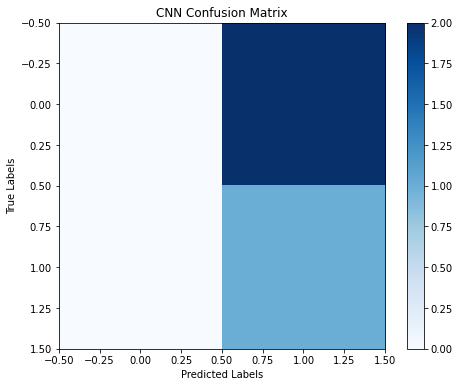

In [29]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion),
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()